In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
path = str(Path(Path('File.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

path = str(Path(Path('thermo.py').parent.absolute()).parent.absolute())
sys.path.insert(0, path)

import numpy as np
import matplotlib as mlab
import matplotlib.pyplot as plt
import scipy
import xarray as xr
import os as os
import glob
import matplotlib.gridspec as gridspec
from tools.cbook import pickle2Obj
import tools
from tools.FV3_tools import read_solo_fields
from tools.CM1_tools import read_cm1_fields

from pltbook import nice_clevels, nice_mxmnintvl, container, plot_contour_row

import matplotlib.colors as mcolors

cmap_data = [(1.0, 1.0, 1.0),
         (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
         (0.0, 1.0, 1.0),
         (0.0, 0.8784313797950745, 0.501960813999176),
         (0.0, 0.7529411911964417, 0.0),
         (0.501960813999176, 0.8784313797950745, 0.0),
         (1.0, 1.0, 0.0),
         (1.0, 0.6274510025978088, 0.0),
         (1.0, 0.0, 0.0),
         (1.0, 0.125490203499794, 0.501960813999176),
         (0.9411764740943909, 0.250980406999588, 1.0),
         (0.501960813999176, 0.125490203499794, 1.0),
         (0.250980406999588, 0.250980406999588, 1.0),
         (0.125490203499794, 0.125490203499794, 0.501960813999176),
         (0.125490203499794, 0.125490203499794, 0.125490203499794),
         (0.501960813999176, 0.501960813999176, 0.501960813999176),
         (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
         (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
         (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
         (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
         (0.4000000059604645, 0.20000000298023224, 0.0)]

_nthreads = 2

# draw filled contours.
wclevs = [0, 1, 2.5, 5, 7.5, 10, 15, 20, 30, 40, 50, 60, 70]

tclevs = list(-40.0 + 2*np.arange(41))

pclevs = list(-15.0 + np.arange(31))

dclevs = list(-20.0 + np.arange(41))


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### SOLO

In [13]:
paths = {}
paths['solo1'] = '/work/wicker/Odin_scr/solo/bubble_3km_dt20_hdd125_C2000_00'
paths['solo2'] = '/work/wicker/Odin_scr/solo/bubble_2km_dt12_hdd125_C2000_00'
paths['solo3'] = '/work/wicker/Odin_scr/solo/bubble_1km_dt06_hdd125_C2000_00'
paths['solo4'] = '/work/wicker/Odin_scr/solo/bubble_3km_dt01_hdd125_C2000_00'

# ksplit = 4
# paths['solo1'] = '/work/wicker/Odin_scr/solo/bubble_3km_remap_hdd125_C2000_00'
# paths['solo2'] = '/work/wicker/Odin_scr/solo/bubble_3km_remap_hdd012_C2000_00'
# paths['solo3'] = '/work/wicker/Odin_scr/solo/bubble_3km_remap_hdd001_C2000_00'

solo_hdd125 = [read_solo_fields(paths['solo1'], vars = ['+','div2d'], file_pattern=None, ret_dbz=False, ret_ds=True),
               read_solo_fields(paths['solo2'], vars = ['+','div2d'], file_pattern=None, ret_dbz=False, ret_ds=True),
               read_solo_fields(paths['solo3'], vars = ['+','div2d'], file_pattern=None, ret_dbz=False, ret_ds=True),
               read_solo_fields(paths['solo4'], vars = ['+','div2d'], file_pattern=None, ret_dbz=False, ret_ds=True)]

------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/solo/bubble_3km_dt20_hdd125_C2000_00/atmos_hifreq.nc
------------------------------------------------------------------------------------------------------------------------ 

 Reading:  /work/wicker/Odin_scr/solo/bubble_3km_dt20_hdd125_C2000_00/atmos_hifreq.nc 

 -->Computing finite difference 2D divergence

 Completed reading in:  /work/wicker/Odin_scr/solo/bubble_3km_dt20_hdd125_C2000_00/atmos_hifreq.nc 

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/solo/bubble_2km_dt12_hdd125_C2000_00/atmos_hifreq.nc
--------------------------------------------

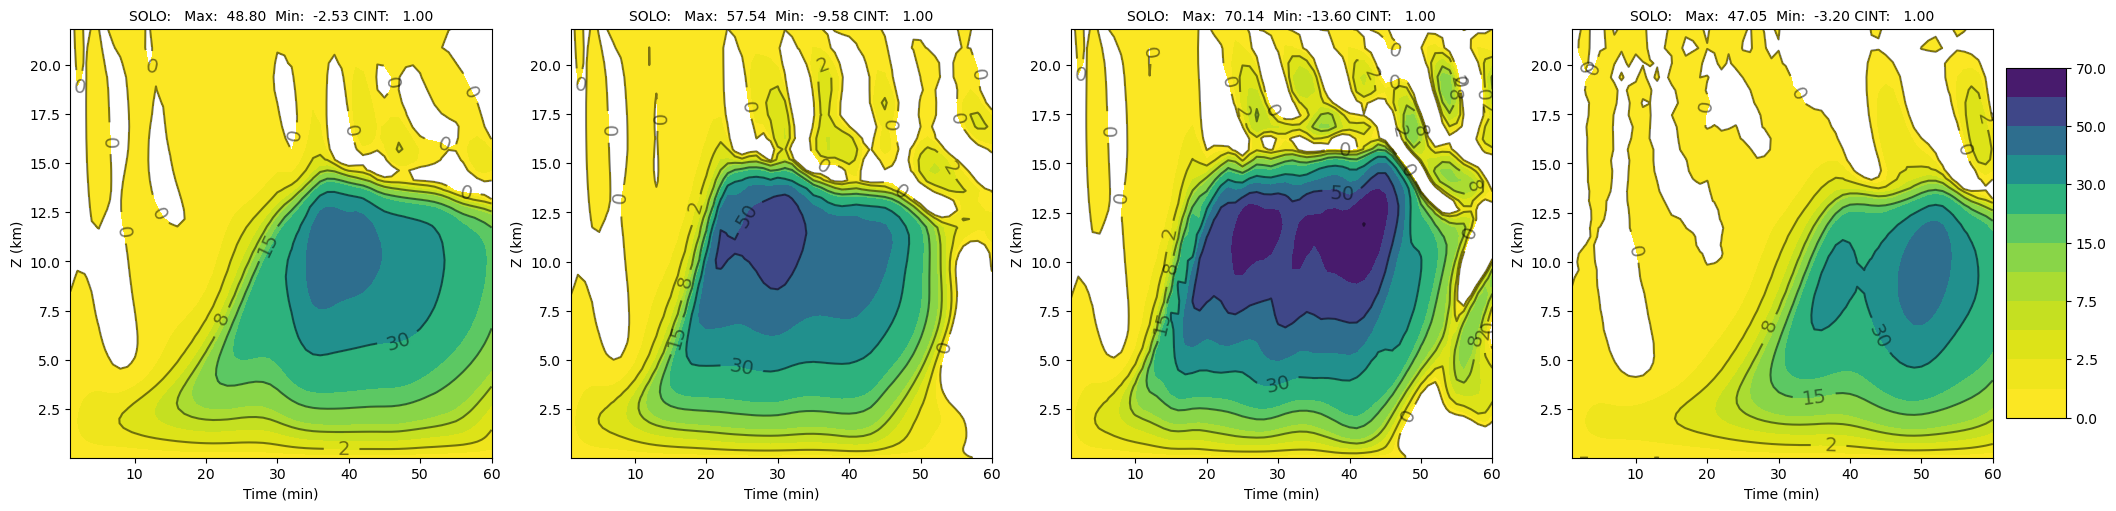

In [15]:
#

loc = [[32, 32], [48, 48], [96, 96], [32, 32]]

#loc = [[32, 32], [32, 32], [32, 32]]

time1 = solo_hdd125[0][1]['time']/60.
time  = np.tile(time1, (60,1)).transpose()

fields = []

for n in np.arange(4):

    iloc, jloc = loc[n][:]

    w_col = solo_hdd125[n][0]['w'][:,:,jloc, iloc]
    z_col = solo_hdd125[n][0]['hgt'][:,:,jloc, iloc] * 0.001

    fields.append(container(time, z_col, w_col))

plot_contour_row(fields, levels=wclevs, title='SOLO', xlabel='Time (min)', ylabel='Z (km)', extra_levels=wclevs, cmap=plt.cm.viridis_r, cint=2.5);


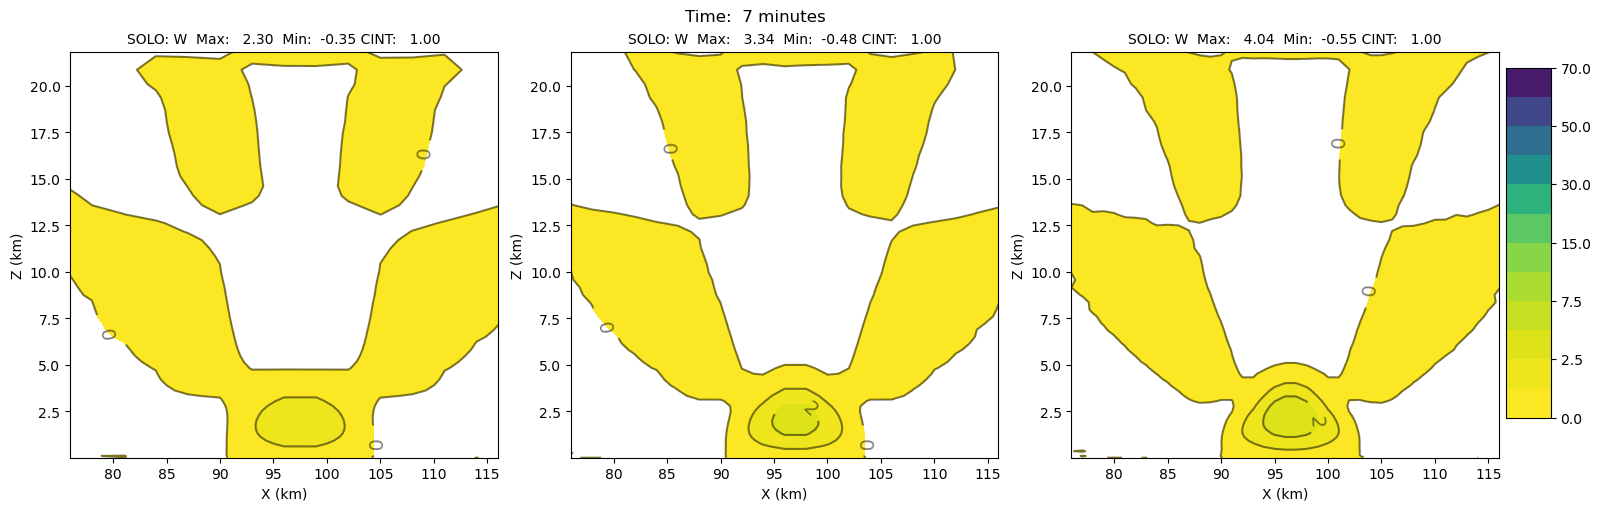

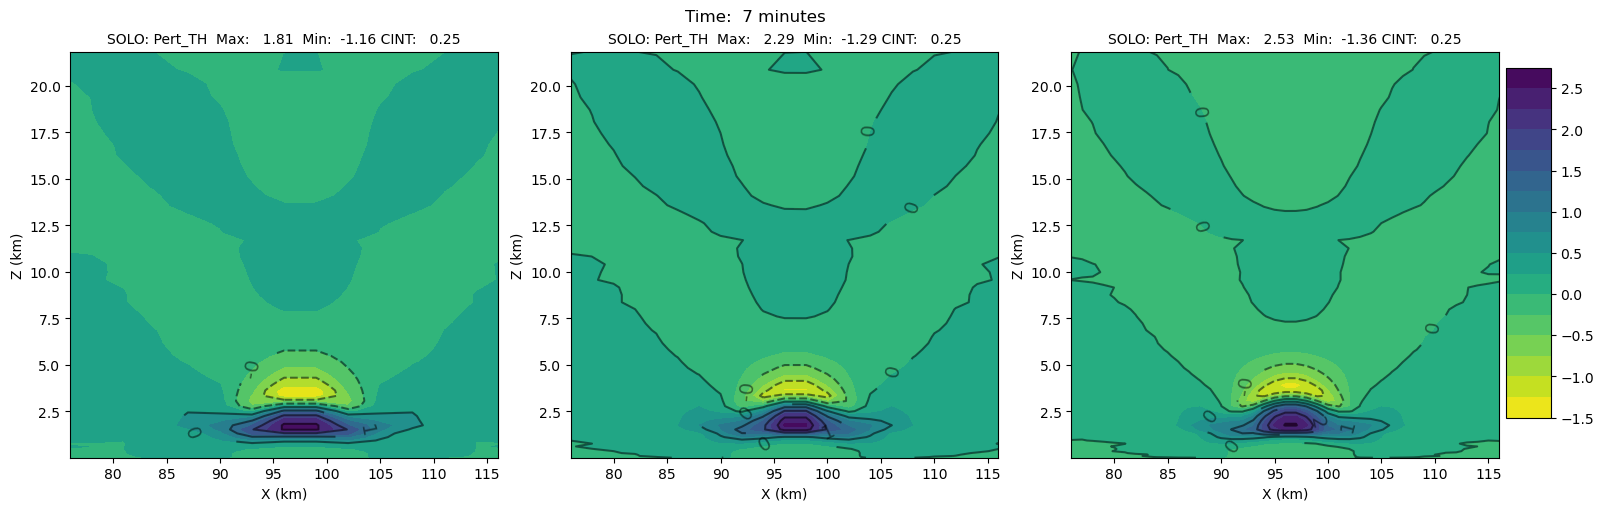

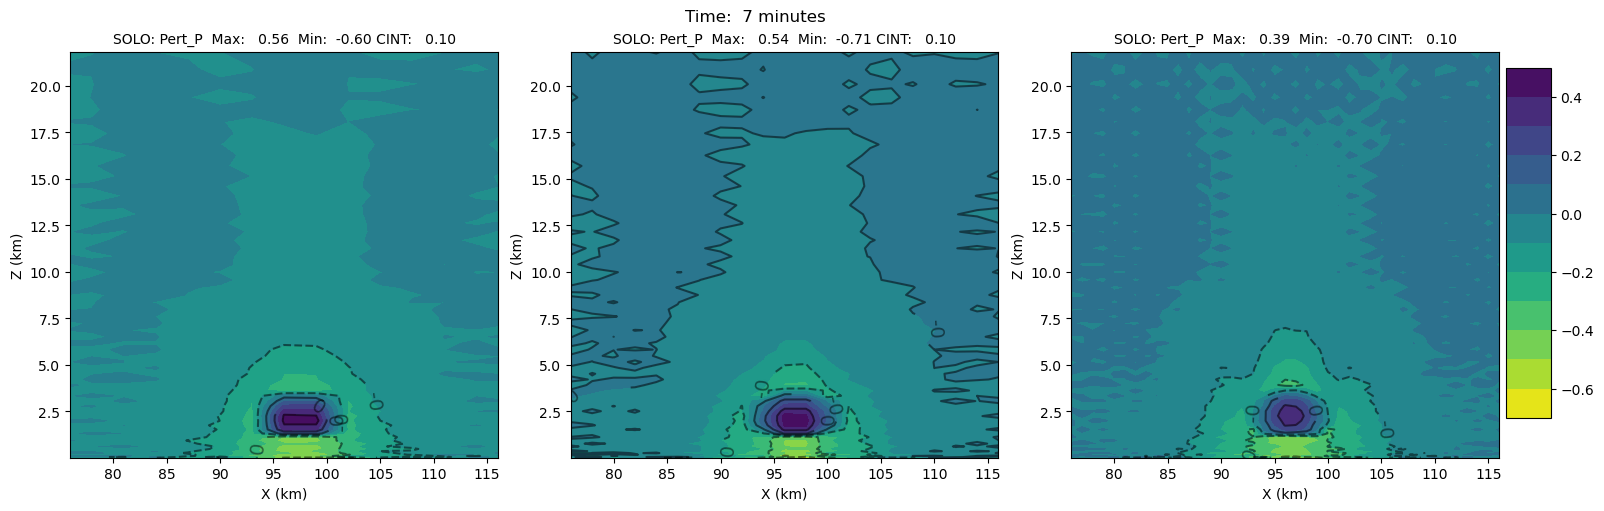

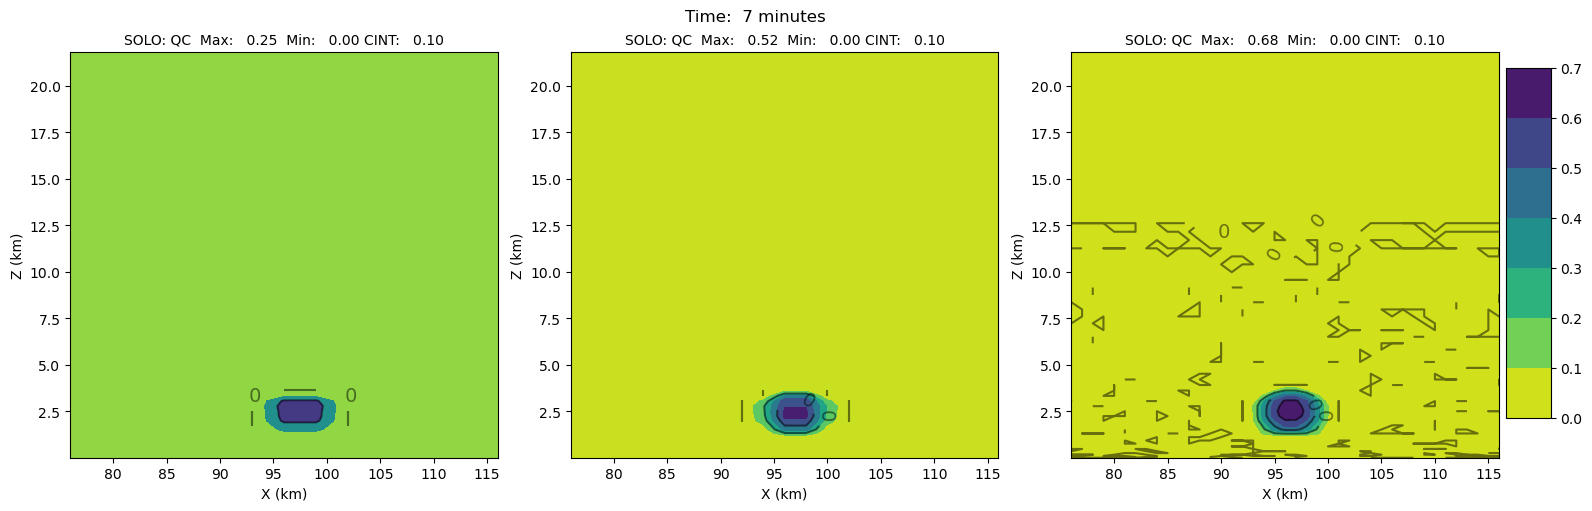

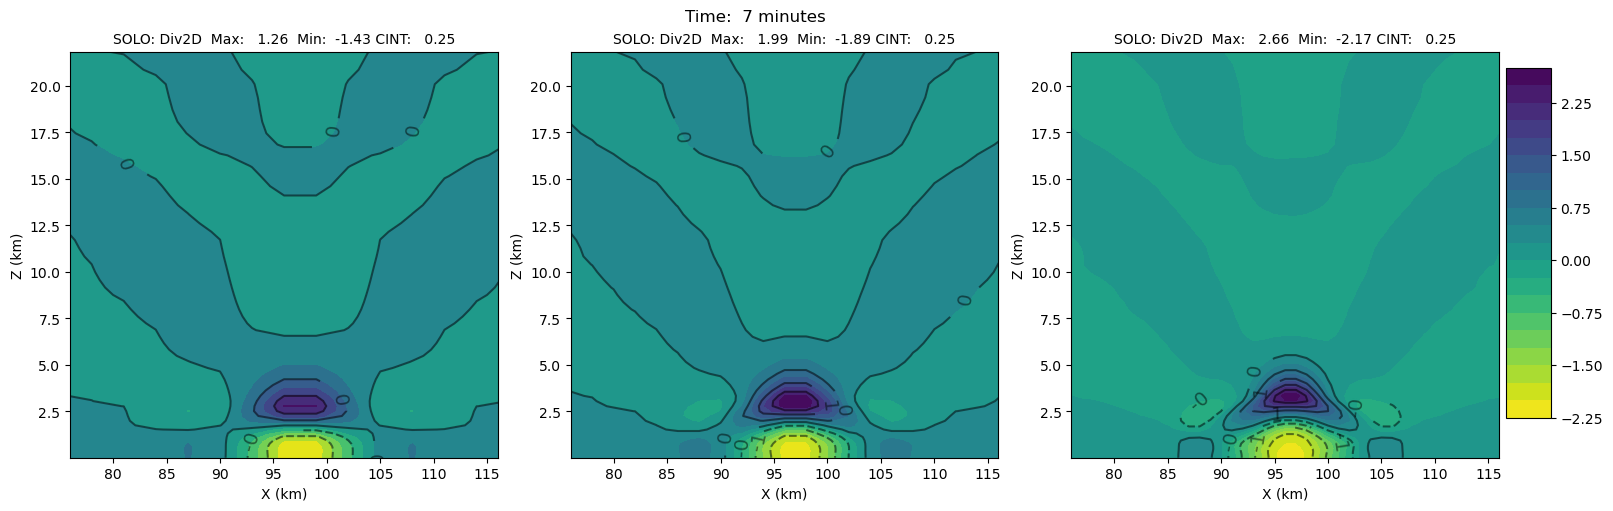

In [7]:
# SOLO XZ

time1 = solo_hdd125[0][1]['time']/60.

t0 = 6

loc = [ [t0, 32], [t0, 48 ], [t0, 96] ]

res = [3,2,1]

title = 'SOLO'

wlist, dlist, thlist, pplist, qclist = [],[],[],[],[]

for n in np.arange(3):

    tloc, jloc = loc[n][:]

    suptitle = "Time:  %d minutes" % int(time1[tloc])

    z_col = solo_hdd125[n][0]['hgt'][tloc,:,jloc, :] * 0.001
    x1 = solo_hdd125[n][1]['grid_xt'].values*res[n]
    x  = np.tile(x1, (z_col.shape[0],1))

    w  = solo_hdd125[n][0]['w'][tloc,:,jloc,:]
    d  = solo_hdd125[n][0]['div2d'][tloc,:,jloc,:] / res[n]
    th = solo_hdd125[n][0]['pert_th'][tloc,:,jloc,:]
    pp = solo_hdd125[n][0]['pert_nh'][tloc,:,jloc,:]/100.
    qc = solo_hdd125[n][0]['qc'][tloc,:,jloc,:]*1000.
        
    wlist.append(container(x, z_col, w))
    dlist.append(container(x, z_col, d))
    thlist.append(container(x, z_col, th))
    pplist.append(container(x, z_col, pp))
    qclist.append(container(x, z_col, qc))
        
# Compare exact and calculated derivative:

plot_contour_row(wlist,  levels=wclevs, title=title, suptitle=suptitle, var='W',       range=[76,116], xlabel='X (km)', ylabel='Z (km)', cl_levels=wclevs);
plot_contour_row(thlist,                title=title, suptitle=suptitle, var='Pert_TH', range=[76,116], xlabel='X (km)', ylabel='Z (km)', cint=0.25)# cl_levels=tclevs[::2]);
plot_contour_row(pplist,                title=title, suptitle=suptitle, var='Pert_P',  range=[76,116], xlabel='X (km)', ylabel='Z (km)', cint=0.1);
plot_contour_row(qclist,                title=title, suptitle=suptitle, var='QC',      range=[76,116], xlabel='X (km)', ylabel='Z (km)', cint=0.1);
plot_contour_row(dlist,                 title=title, suptitle=suptitle, var='Div2D',   range=[76,116], xlabel='X (km)', ylabel='Z (km)', cint=0.25);


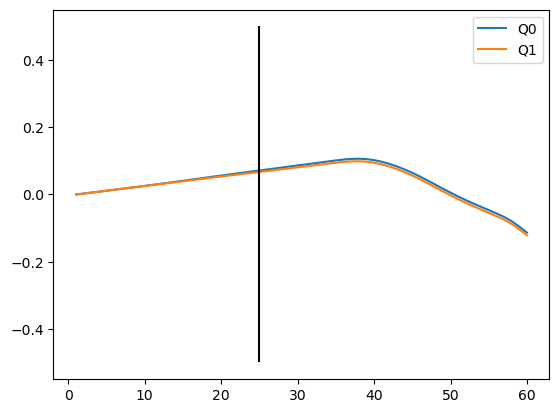

   1  0.00000734   15834489.000000   437.000000   15996626.000000   431.000000
   2  0.00000734   15834926.000000   447.000000   15997057.000000   451.000000
   3  0.00000734   15835373.000000   448.000000   15997508.000000   450.000000
   4  0.00000734   15835821.000000   443.000000   15997958.000000   463.000000
   5  0.00000831   15836264.000000   457.000000   15998421.000000   447.000000
   6  0.00003037   15836721.000000   448.000000   15998868.000000   457.000000
   7  0.00006851   15837169.000000   467.000000   15999325.000000   460.000000
   8  0.00011659   15837636.000000   435.000000   15999785.000000   436.000000
   9  0.00015386   15838071.000000   471.000000   16000221.000000   459.000000
  10  0.00019219   15838542.000000   469.000000   16000680.000000   452.000000
  11  0.00022185   15839011.000000   471.000000   16001132.000000   457.000000
  12  0.00026030   15839482.000000   471.000000   16001589.000000   455.000000
  13  0.00030162   15839953.000000   498.000000   16

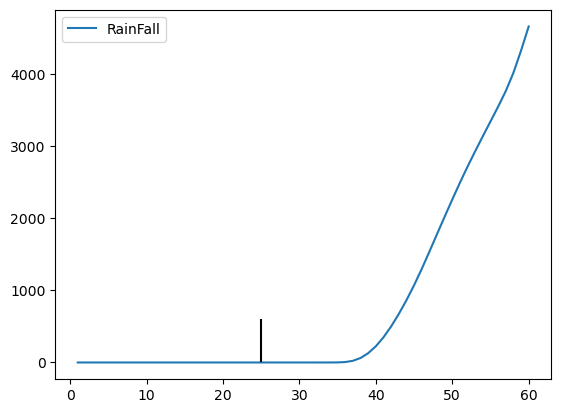

In [66]:
#---------------------------------------------------------------------
def interp4Dz_np(data, z3d, z1d, nthreads = 10):
    import multiprocessing as mp
    
    dinterp = np.zeros((data.shape[0],len(z1d),data.shape[2],data.shape[3]),dtype=np.float32)

    if nthreads > 0:  # turning this off for now.
        def worker(t,j,i):
            print("running %d %s" % (t, data.shape))
            dinterp[t,:,j,i] = np.interp(z1d, z3d[t,:,j,i], data[t,:,j,i])

        pool = mp.Pool(nthreads)
        for t in np.arange(data.shape[0]):
            for j in np.arange(data.shape[2]):
                for i in np.arange(data.shape[3]):
                    pool.apply_async(worker, args = (t, j, i, ))
        pool.close()
        pool.join()

        return dinterp

    else:       
        
        for t in np.arange(data.shape[0]):
            for j in np.arange(data.shape[2]):
                for i in np.arange(data.shape[3]):
                    dinterp[t,:,j,i] = np.interp(z1d, z3d[t,:,j,i], data[t,:,j,i])

        return dinterp
        
#---------------------------------------------------------------------
# define a grid to interpolation profiles to

tloc = 8

zhgts = 50. + 100.*np.arange(200)

time1 = solo_hdd125[0][1]['time']/60.

z3d = solo_hdd125[3][0]['hgt'][:,:,:, :] 

qc = solo_hdd125[2][0]['qc'][:,:,:,:]
qv = solo_hdd125[2][0]['qv'][:,:,:,:]
qr = solo_hdd125[2][0]['qr'][:,:,:,:]

delp  = solo_hdd125[2][1]['delp'][:,::-1,:,:].values
spfh  = solo_hdd125[2][1]['spfh'][:,::-1,:,:].values
clwmr =  solo_hdd125[2][1]['clwmr'][:,::-1,:,:].values
rwmr  =  solo_hdd125[2][1]['rwmr'][:,::-1,:,:].values
accum =  solo_hdd125[2][1]['accumulated_rain'][:,:,:].sum(axis=(1,2)).values

qsum0 = ((qv+qc+qr)*delp).sum(axis=(1,2,3))
qsum1 = ((spfh+clwmr+rwmr)*delp).sum(axis=(1,2,3))
# qc_interp = interp4Dz_np(qc, z3d, zhgts)
# qv_interp = interp4Dz_np(qv, z3d, zhgts)

plt.plot(time1, 100*(qsum0-qsum0[0])/qsum0[0], label='Q0')
plt.plot(time1, 100*(qsum1-qsum1[0])/qsum1[0], label='Q1')
plt.vlines(25, -0.5, 0.5, color='k')

plt.legend()
plt.show()

plt.plot(time1, accum, label='RainFall')
plt.vlines(25, 0, 600, color='k')
plt.legend()

for n in np.arange(40):
    print(("%4.0f  %10.8f   %f   %f   %f   %f") % (time1[n],accum[n],qsum0[n],qsum0[n+1]-qsum0[n], qsum1[n],qsum1[n+1]-qsum1[n] ))


In [ ]:
#---------------------------------------------------------------------
# define a grid to interpolation profiles to

tloc = 8

zhgts = 50. + 100.*np.arange(200)

time1 = solo_hdd125[0][1]['time']/60.

z3d = solo_hdd125[0][0]['hgt'][:,:,:, :] 

qc = cm1_hdd125[0][0]['qc'][:,:,:,:]
qv = cm1_hdd125[0][0]['qv'][:,:,:,:]
qr = cm1_hdd125[0][0]['qr'][:,:,:,:]

spfh  = solo_hdd125[0][1]['spfh'][:,::-1,:,:].values
clwmr =  solo_hdd125[0][1]['clwmr'][:,::-1,:,:].values
rwmr  =  solo_hdd125[0][1]['rwmr'][:,::-1,:,:].values
accum =  solo_hdd125[0][1]['accumulated_rain'][:,:,:].sum(axis=(1,2)).values

qsum0 = ((qv+qc+qr)*delp).sum(axis=(1,2,3))
qsum1 = ((spfh+clwmr+rwmr)*delp).sum(axis=(1,2,3))
# qc_interp = interp4Dz_np(qc, z3d, zhgts)
# qv_interp = interp4Dz_np(qv, z3d, zhgts)

plt.plot(time1, 100*(qsum0-qsum0[0])/qsum0[0], label='Q0')
plt.plot(time1, 100*(qsum1-qsum1[0])/qsum1[0], label='Q1')
plt.vlines(25, -0.5, 0.5, color='k')

plt.legend()
plt.show()

plt.plot(time1, accum, label='RainFall')
plt.vlines(25, 0, 600, color='k')
plt.legend()

for n in np.arange(40):
    print(("%10.8f   %f   %f   %f   %f") % (accum[n],qsum0[n],qsum0[n+1]-qsum0[n], qsum1[n],qsum1[n+1]-qsum1[n] ))


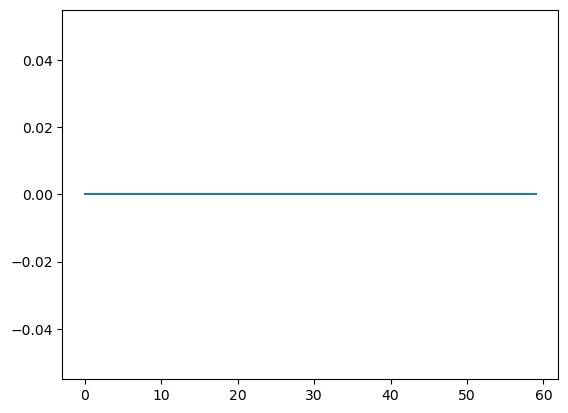

In [23]:
qsum = (qv_interp+qv_interp).sum(axis=(1,2,3))

plt.plot(qsum*1000)

            

### CM1 - 3km

In [8]:
paths = {}
paths['cm1_3km_hdd125'] = '/work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_dt05_hdd125_C2000_00'
paths['cm1_2km_hdd125'] = '/work/wicker/Odin_scr/cm1r20.3/run/bubble_2km_dt03_hdd125_C2000_00'
paths['cm1_1km_hdd125'] = '/work/wicker/Odin_scr/cm1r20.3/run/bubble_1km_dt01_hdd125_C2000_00'

cm1_hdd125 = [read_cm1_fields(paths['cm1_3km_hdd125'] , vars = ['+','div2d','uns_div2d'], file_pattern=None, ret_dbz=False, ret_ds=True),
              read_cm1_fields(paths['cm1_2km_hdd125'] , vars = ['+','div2d','uns_div2d'], file_pattern=None, ret_dbz=False, ret_ds=True),
              read_cm1_fields(paths['cm1_1km_hdd125'] , vars = ['+','div2d','uns_div2d'], file_pattern=None, ret_dbz=False, ret_ds=True)]

------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_dt05_hdd125_C2000_00/cm1out.nc
------------------------------------------------------------------------------------------------------------------------ 

 Reading:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_dt05_hdd125_C2000_00/cm1out.nc 

 -->Computing finite difference 2D divergence

 -->Computing unstaggered finite difference 2D divergence

 Completed reading in:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_dt05_hdd125_C2000_00/cm1out.nc 

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_2km_dt03_hdd

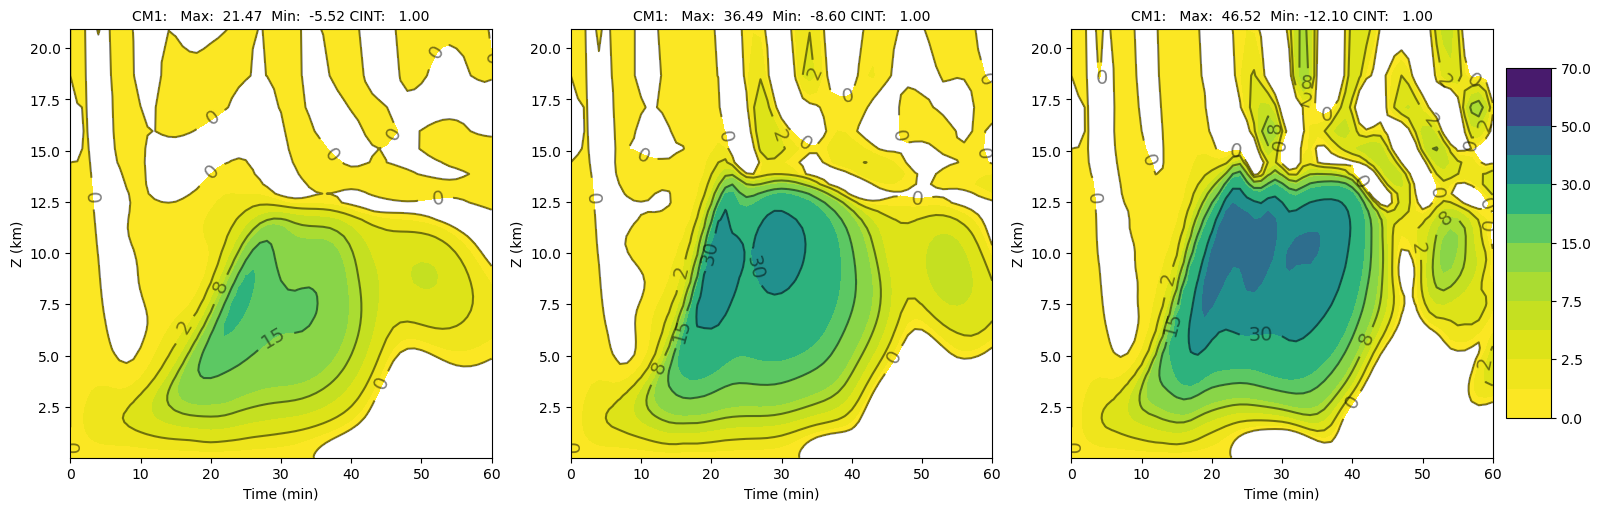

In [9]:
# CM1 multi-resolution plots
#
time1 = cm1_hdd125[0][1]['time']/60.
time  = np.tile(time1, (60,1)).transpose()

fields = []

for n in np.arange(3):

    if n == 0:
        iloc, jloc = 32, 32
    elif n == 1:
        iloc, jloc = 48, 48
    else:
        iloc, jloc = 96, 96

    w_col = cm1_hdd125[n][0]['w'][:,:,jloc, iloc]
    z1d    = cm1_hdd125[n][1].zh.values[:]
    z_col  = np.tile(z1d, (time1.shape[0],1))

    fields.append(container(time, z_col, w_col))

plot_contour_row(fields, levels=wclevs, title='CM1', xlabel='Time (min)', ylabel='Z (km)', extra_levels=wclevs, cmap=plt.cm.viridis_r);


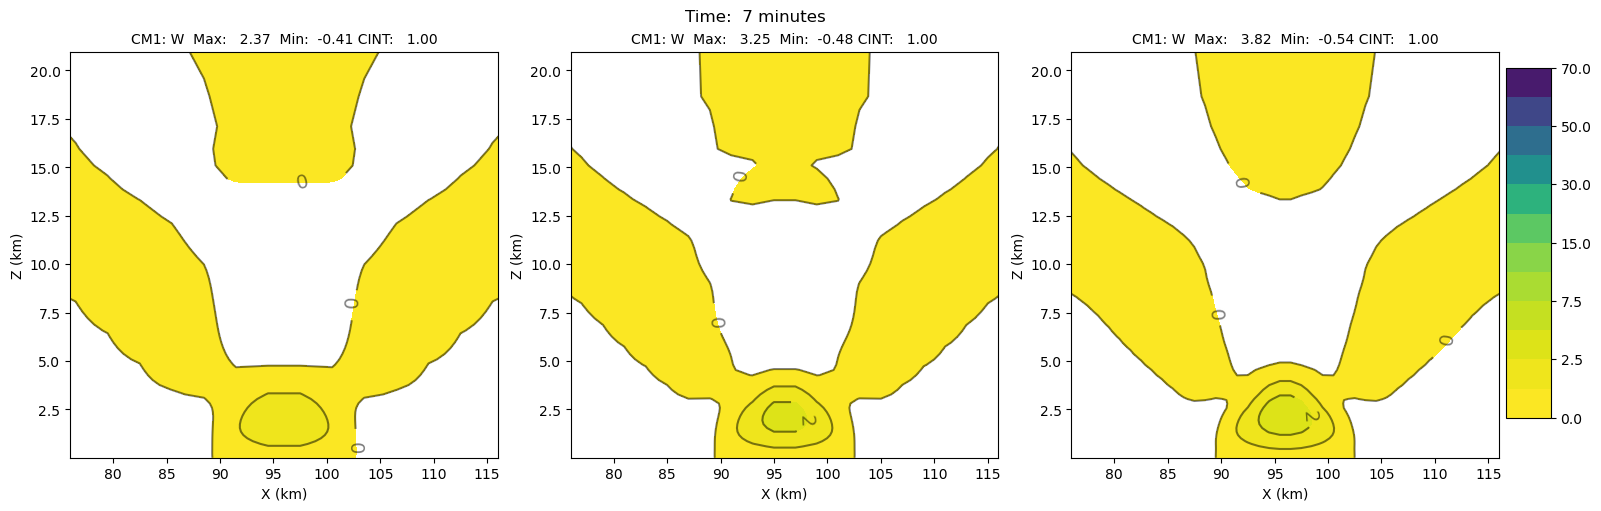

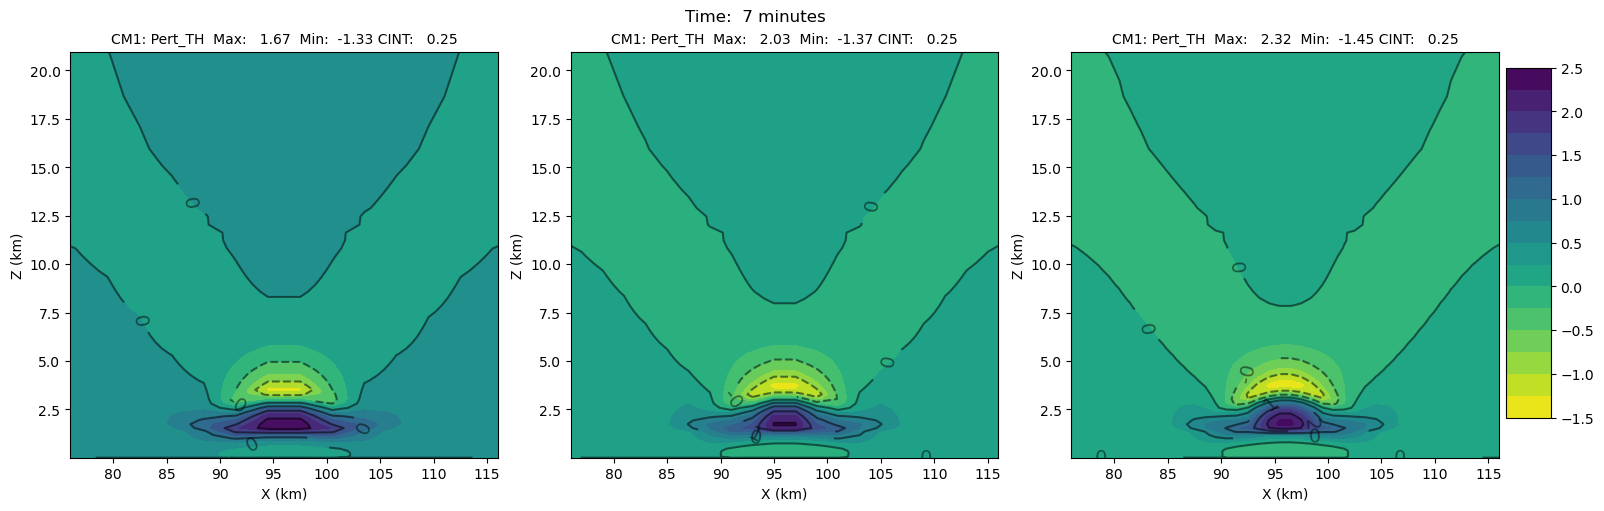

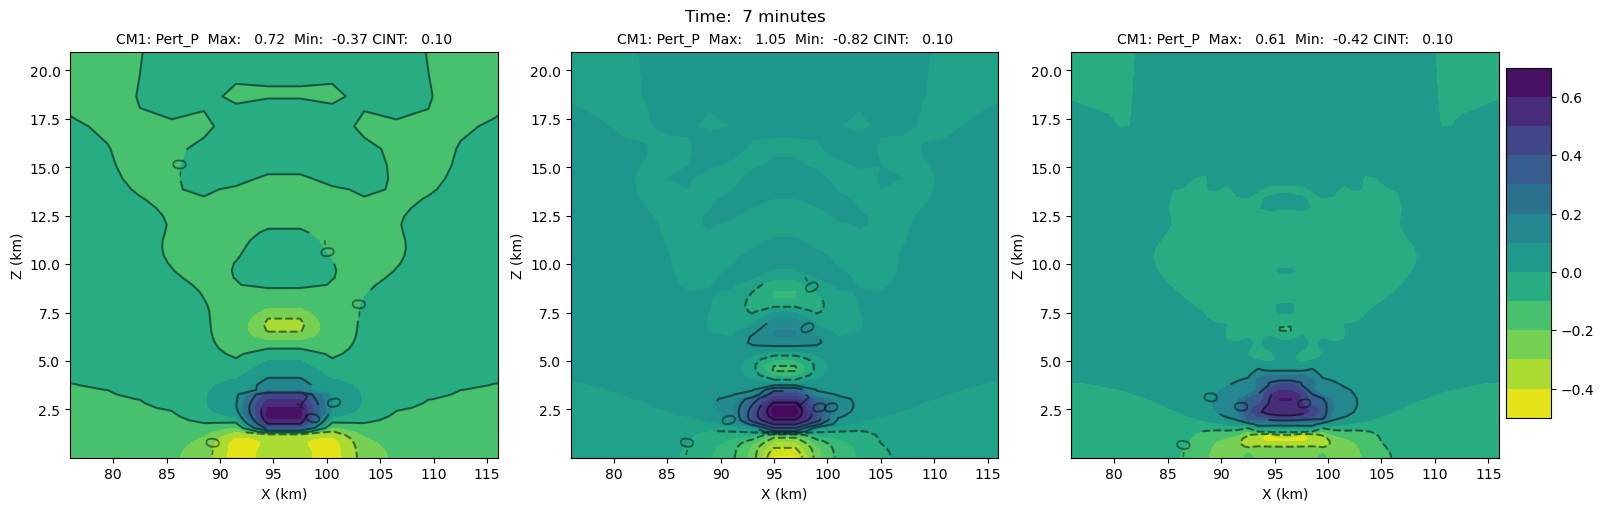

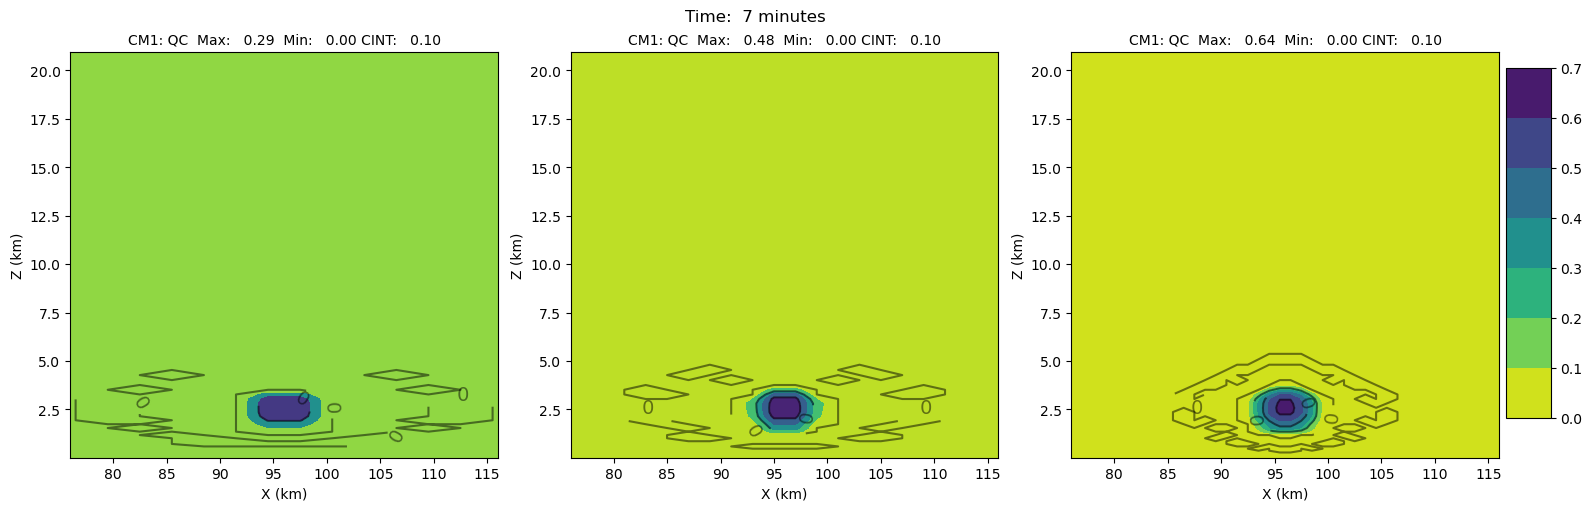

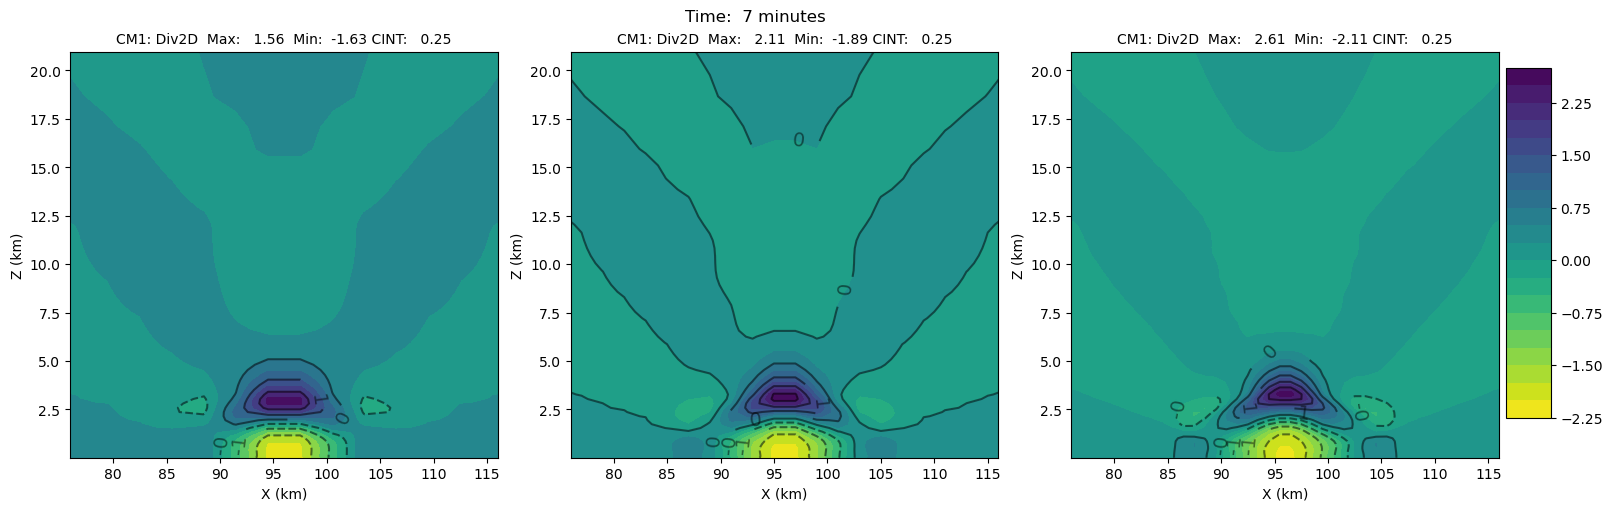

In [10]:
# CM1 plots

t0 = 7

loc = [ [t0, 32], [t0, 48 ], [t0, 96] ]

time1 = cm1_hdd125[0][1]['time']/60.

title='CM1'

wlist = []
dlist = []
thlist = []
pplist = []
qclist = []

for n in np.arange(3):

    tloc, jloc = loc[n][:]

    suptitle = "Time:  %d minutes" % int(time1[tloc])

    z2d = cm1_hdd125[n][0]['hgt'][tloc,:,jloc, :]*0.001
    x1  = cm1_hdd125[n][1]['xh']
    x   = np.tile(x1, (z2d.shape[0],1))
    d   = cm1_hdd125[n][0]['div2d'][tloc,:,jloc,:] 
    w   = cm1_hdd125[n][0]['w'][tloc,:,jloc, :]
    thp = cm1_hdd125[n][0]['pert_th'][tloc,:,jloc, :]
    pp  = cm1_hdd125[n][0]['pert_p'][tloc,:,jloc, :] / 100.
    qc  = cm1_hdd125[n][0]['qc'][tloc,:,jloc, :] * 1000.
        
    wlist.append(container(x, z2d, w))
    dlist.append(container(x, z2d, d))
    thlist.append(container(x, z2d, thp))
    pplist.append(container(x, z2d, pp))
    qclist.append(container(x, z2d, qc))
    
    
# Compare exact and calculated derivative:

plot_contour_row(wlist,  levels=wclevs, title=title, suptitle=suptitle, var='W',       range=[76,116], xlabel='X (km)', ylabel='Z (km)', cl_levels=wclevs);
plot_contour_row(thlist,                title=title, suptitle=suptitle, var='Pert_TH', range=[76,116], xlabel='X (km)', ylabel='Z (km)', cint=0.25)# cl_levels=tclevs[::2]);
plot_contour_row(pplist,                title=title, suptitle=suptitle, var='Pert_P',  range=[76,116], xlabel='X (km)', ylabel='Z (km)', cint=0.1);
plot_contour_row(qclist,                title=title, suptitle=suptitle, var='QC',      range=[76,116], xlabel='X (km)', ylabel='Z (km)', cint=0.1);
plot_contour_row(dlist,                 title=title, suptitle=suptitle, var='Div2D',   range=[76,116], xlabel='X (km)', ylabel='Z (km)', cint=0.25);


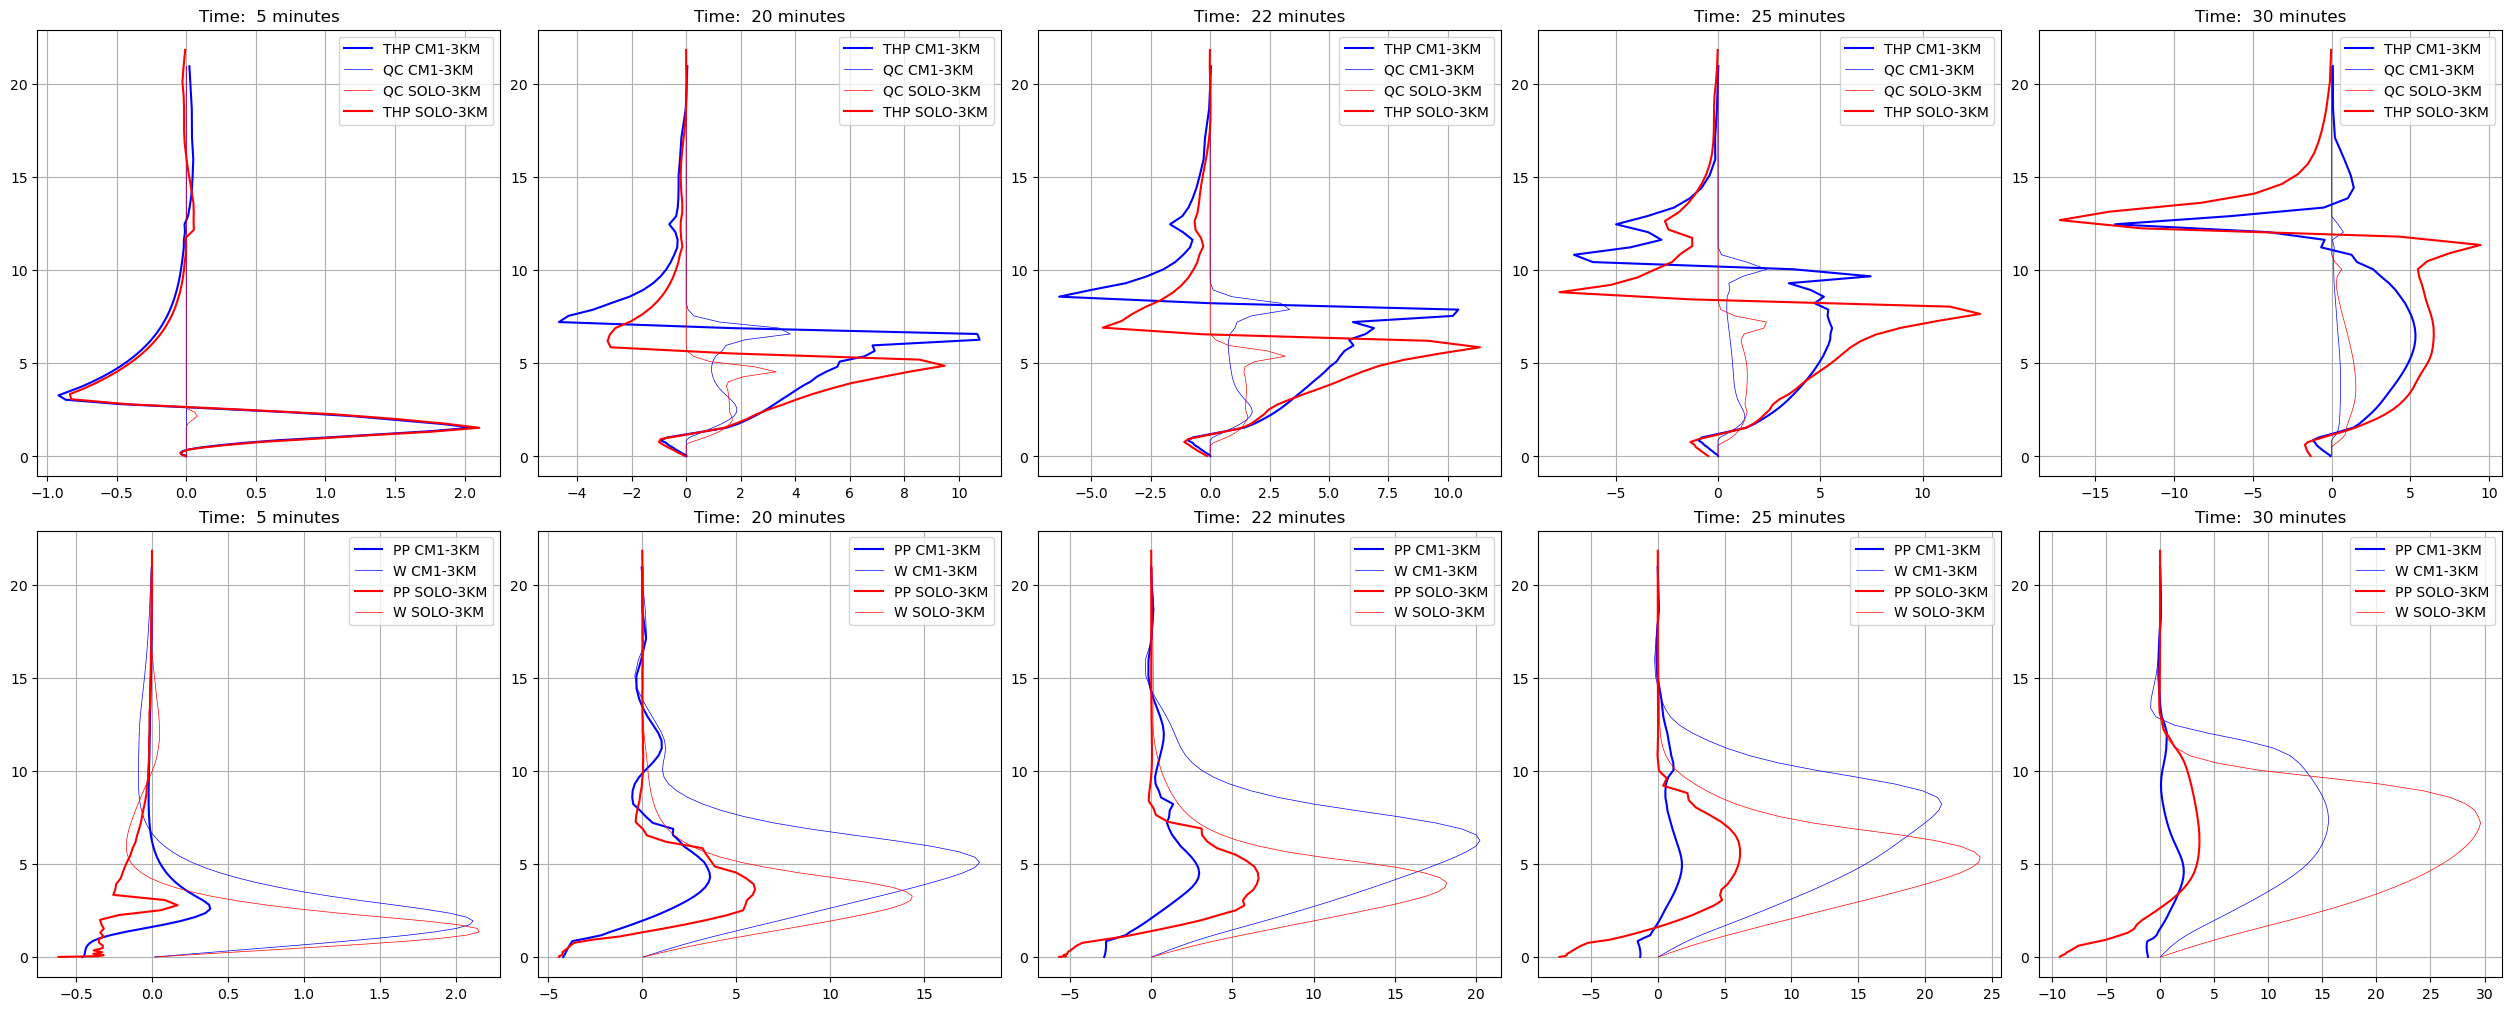

In [11]:
# Updraft Core plots

tplot = [5, 20, 22, 25, 30]

cm1_time = cm1_hdd125[0][1]['time']/60.

fig, axes = fig, axes = plt.subplots(2,len(tplot), constrained_layout=True, figsize=(5*len(tplot),10))

for n, tloc in enumerate(tplot):

    iloc, jloc = 32, 32

    title = "Time:  %d minutes" % int(cm1_time[tloc])

    z_cm1   = cm1_hdd125[0][0]['hgt'][tloc, :, jloc, iloc]*0.001
    thp_cm1 = cm1_hdd125[0][0]['pert_th'][tloc,:,jloc, iloc]
    pp_cm1  = cm1_hdd125[0][0]['pert_p'][tloc,:,jloc, iloc] / 100.
    qc_cm1  = cm1_hdd125[0][0]['qc'][tloc,:,jloc, iloc] * 1000.
    w_cm1   = cm1_hdd125[0][0]['w'][tloc,:,jloc, iloc]

    z_solo   = solo_hdd125[0][0]['hgt'][tloc-1,:,jloc, iloc] * 0.001
    thp_solo = solo_hdd125[0][0]['pert_th'][tloc-1,:,jloc,iloc]
    pp_solo  = solo_hdd125[0][0]['pert_nh'][tloc,:,jloc,iloc]/100.
    qc_solo  = solo_hdd125[0][0]['qc'][tloc,:,jloc,iloc]*1000.
    w_solo   = solo_hdd125[0][0]['w'][tloc,:, jloc, iloc]

    axes[0,n].plot(thp_cm1, z_cm1, color='b', label='THP CM1-3KM')
    axes[0,n].plot(qc_cm1, z_cm1, color='b', linewidth=0.5, label='QC CM1-3KM')
    axes[0,n].plot(qc_solo, z_cm1, color='r', linewidth=0.5, label='QC SOLO-3KM')
    axes[0,n].plot(thp_solo, z_solo, color='r', label='THP SOLO-3KM')
    axes[0,n].set_title(title)
    axes[0,n].legend()
    axes[0,n].grid()

    axes[1,n].plot(pp_cm1, z_cm1, color='b', label='PP CM1-3KM')
    axes[1,n].plot(w_cm1, z_cm1, color='b', linewidth=0.5, label='W CM1-3KM')
    axes[1,n].plot(pp_solo, z_solo, color='r', label='PP SOLO-3KM')
    axes[1,n].plot(w_solo, z_cm1, color='r', linewidth=0.5, label='W SOLO-3KM')
    axes[1,n].grid()

    axes[1,n].set_title(title)
    axes[1,n].legend()


plt.show()

    # d   = cm1_hdd125[n][0]['div2d'][tloc,:,jloc,:] 
    # w   = cm1_hdd125[n][0]['w'][tloc,:,jloc, :]

    # pp  = cm1_hdd125[n][0]['pert_p'][tloc,:,jloc, :] / 100.
    # qc  = cm1_hdd125[n][0]['qc'][tloc,:,jloc, :] * 1000.


------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_noWadv_hdd125_C2000_00/cm1out.nc
------------------------------------------------------------------------------------------------------------------------ 

 Reading:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_noWadv_hdd125_C2000_00/cm1out.nc 

 -->Computing unstaggered finite difference 2D divergence

 -->Computing finite difference 2D divergence

 Completed reading in:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_noWadv_hdd125_C2000_00/cm1out.nc 

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------ 

 Added default filename to path input:  /work/wicker/Odin_scr/cm1r20.3/run/bubble_3km_CV

18.485563
19.875565


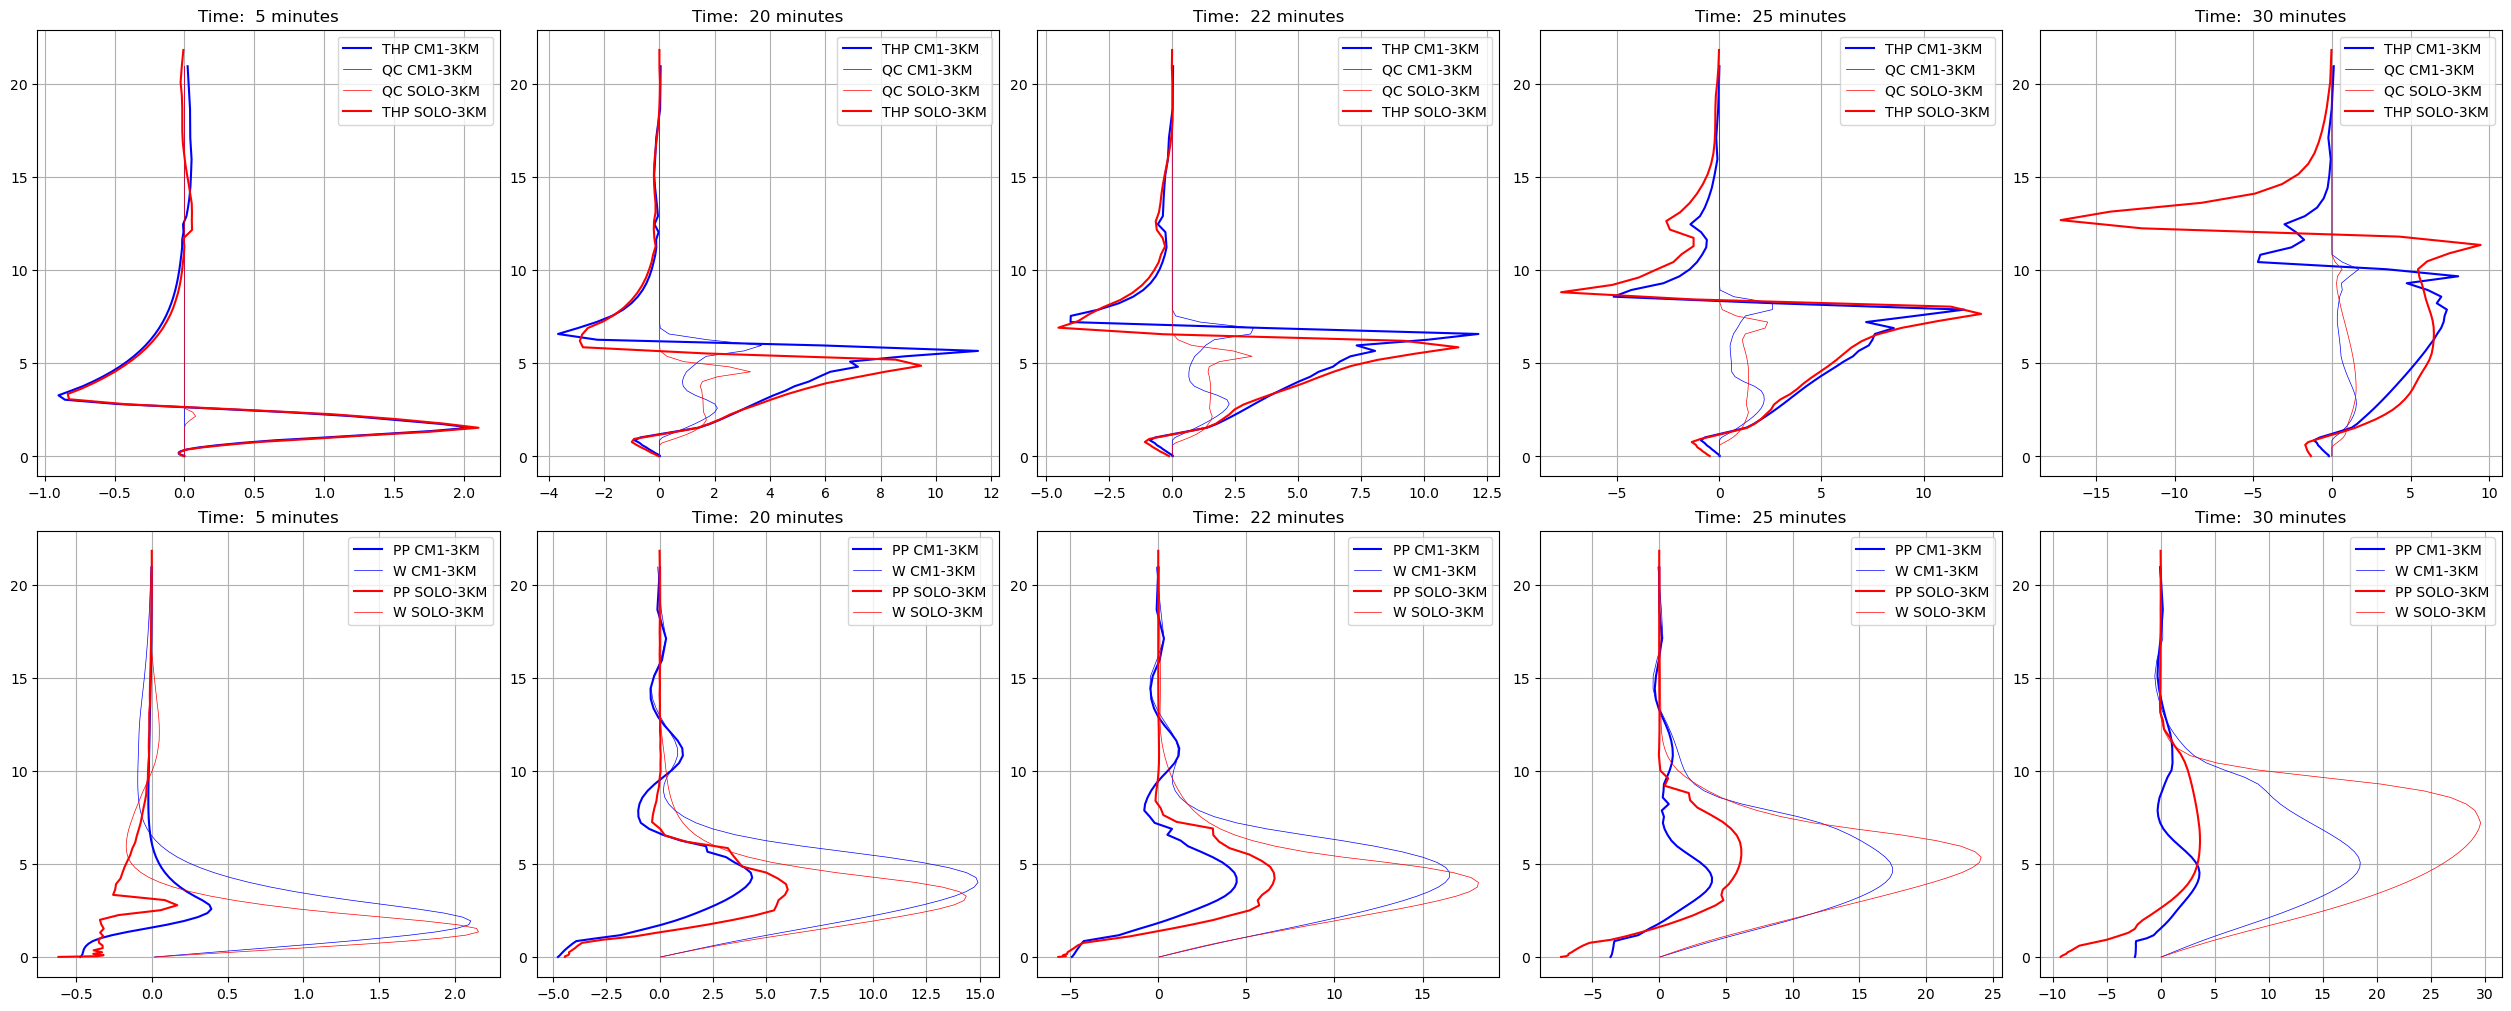

In [179]:
# Updraft Core plots

print(cm1_test[0][0]['w'][:,:,jloc, iloc].max())
print(cm1_test[1][0]['w'][:,:,jloc, iloc].max())

m = 1

tplot = [5, 20, 22, 25, 30]

cm1_time = cm1_hdd125[0][1]['time']/60.

fig, axes = fig, axes = plt.subplots(2,len(tplot), constrained_layout=True, figsize=(5*len(tplot),10))

for n, tloc in enumerate(tplot):

    iloc, jloc = 32, 32

    title = "Time:  %d minutes" % int(cm1_time[tloc])

    z_cm1   = cm1_test[m][0]['hgt'][tloc, :, jloc, iloc]*0.001
    thp_cm1 = cm1_test[m][0]['pert_th'][tloc,:,jloc, iloc]
    pp_cm1  = cm1_test[m][0]['pert_p'][tloc,:,jloc, iloc] / 100.
    qc_cm1  = cm1_test[m][0]['qc'][tloc,:,jloc, iloc] * 1000.
    w_cm1   = cm1_test[m][0]['w'][tloc,:,jloc, iloc]

    z_solo   = solo_hdd125[0][0]['hgt'][tloc-1,:,jloc, iloc] * 0.001
    thp_solo = solo_hdd125[0][0]['pert_th'][tloc-1,:,jloc,iloc]
    pp_solo  = solo_hdd125[0][0]['pert_nh'][tloc,:,jloc,iloc]/100.
    qc_solo  = solo_hdd125[0][0]['qc'][tloc,:,jloc,iloc]*1000.
    w_solo   = solo_hdd125[0][0]['w'][tloc,:, jloc, iloc]

    axes[0,n].plot(thp_cm1, z_cm1, color='b', label='THP CM1-3KM')
    axes[0,n].plot(qc_cm1, z_cm1, color='b', linewidth=0.5, label='QC CM1-3KM')
    axes[0,n].plot(qc_solo, z_cm1, color='r', linewidth=0.5, label='QC SOLO-3KM')
    axes[0,n].plot(thp_solo, z_solo, color='r', label='THP SOLO-3KM')
    axes[0,n].set_title(title)
    axes[0,n].legend()
    axes[0,n].grid()

    axes[1,n].plot(pp_cm1, z_cm1, color='b', label='PP CM1-3KM')
    axes[1,n].plot(w_cm1, z_cm1, color='b', linewidth=0.5, label='W CM1-3KM')
    axes[1,n].plot(pp_solo, z_solo, color='r', label='PP SOLO-3KM')
    axes[1,n].plot(w_solo, z_cm1, color='r', linewidth=0.5, label='W SOLO-3KM')
    axes[1,n].grid()

    axes[1,n].set_title(title)
    axes[1,n].legend()


plt.show()